In [532]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.cluster import KMeans

%matplotlib inline



In [624]:
df = read_clean_data()

## Check if any of the values are null
df[df.isnull().any(axis=1)]

# Get X and Xtranspose
X,XT = get_X_XT(df)

# Assign Cluster
df_cluster = assign_cluster(df,X)



In [651]:
def read_clean_data():
    df = pd.read_csv('./data/Zip_Zhvi_AllHomes_orig.csv')
    
    ## Create dataframe for bayarea zipcodes
    df['Bayarea']='N'
    df.ix[df.CountyName.isin(['San Francisco', 'Contra Costa', 'Alameda', 'Napa', 'Solano',
       'Santa Clara', 'San Mateo', 'Sonoma', 'Marin']),'Bayarea']='Y'
    df_bayarea = df[df.Bayarea=='Y']
    

    
    ## Reset index and take data from year 2000 to 2017
    df_bayarea.reset_index(drop=True, inplace=True)
    df_ba_2000_2017 = df_bayarea.ix[:,range(0,6)+range(52,258)]
    
    ## Delete unwanted columns and rename columns to relevant name
    del df_ba_2000_2017['Bayarea']
    del df_ba_2000_2017['RegionID']
    df_ba_2000_2017.rename(columns={'RegionName': 'Zipcode'}, inplace=True)
    
    ## Get rid of zipcodes with null values
    df_ba_2000_2017 = df_ba_2000_2017[~df_ba_2000_2017.Zipcode.isin([94606,94621,94108,94542,94574,94515,95441])]
    
    ## interpolate value for zipcode 94612
    df_ba_2000_2017.ix[df_ba_2000_2017.Zipcode==94612,'2000-01'] =    df_ba_2000_2017['2000-02'][df_ba_2000_2017.Zipcode==94612].values
    
    # write clean data to csv file
    #df_bayarea.to_csv('./data/zillow_bayarea.csv', sep=',',index=False)
    
    return df_ba_2000_2017

def get_X_XT(df):
    X = df.ix[:,[0]+range(5,210)]
    X.set_index('Zipcode',inplace=True)
    XT = X.T
    XT.index = pd.to_datetime(XT.index)
    return X, XT

def assign_cluster(df,X):
    kmeans = KMeans(n_clusters=20,random_state=0)
    kmeans.fit(X)
    df['Cluster'] = kmeans.labels_
    return df

def plot_clusters(df,XT):
    fig, ax = plt.subplots(nrows=5, ncols=4, figsize=(15, 12))
    row = 0
    col = -1
    for cluster in range(20):
        if col == ncols - 1:
            row = row+1
            col = 0
        else:
            col = col + 1
        
        for zipcode in df[['Zipcode']][df.Cluster==cluster].values:
            zc = int(zipcode)
            ts = pd.Series(XT[zc])/1000000
            ax[row,col].set_ylabel("(in millions)")
            plt.setp(ax[row,col].get_xticklabels(), rotation=30, horizontalalignment='right')
            ax[row,col].plot(ts)
              
    plt.tight_layout()

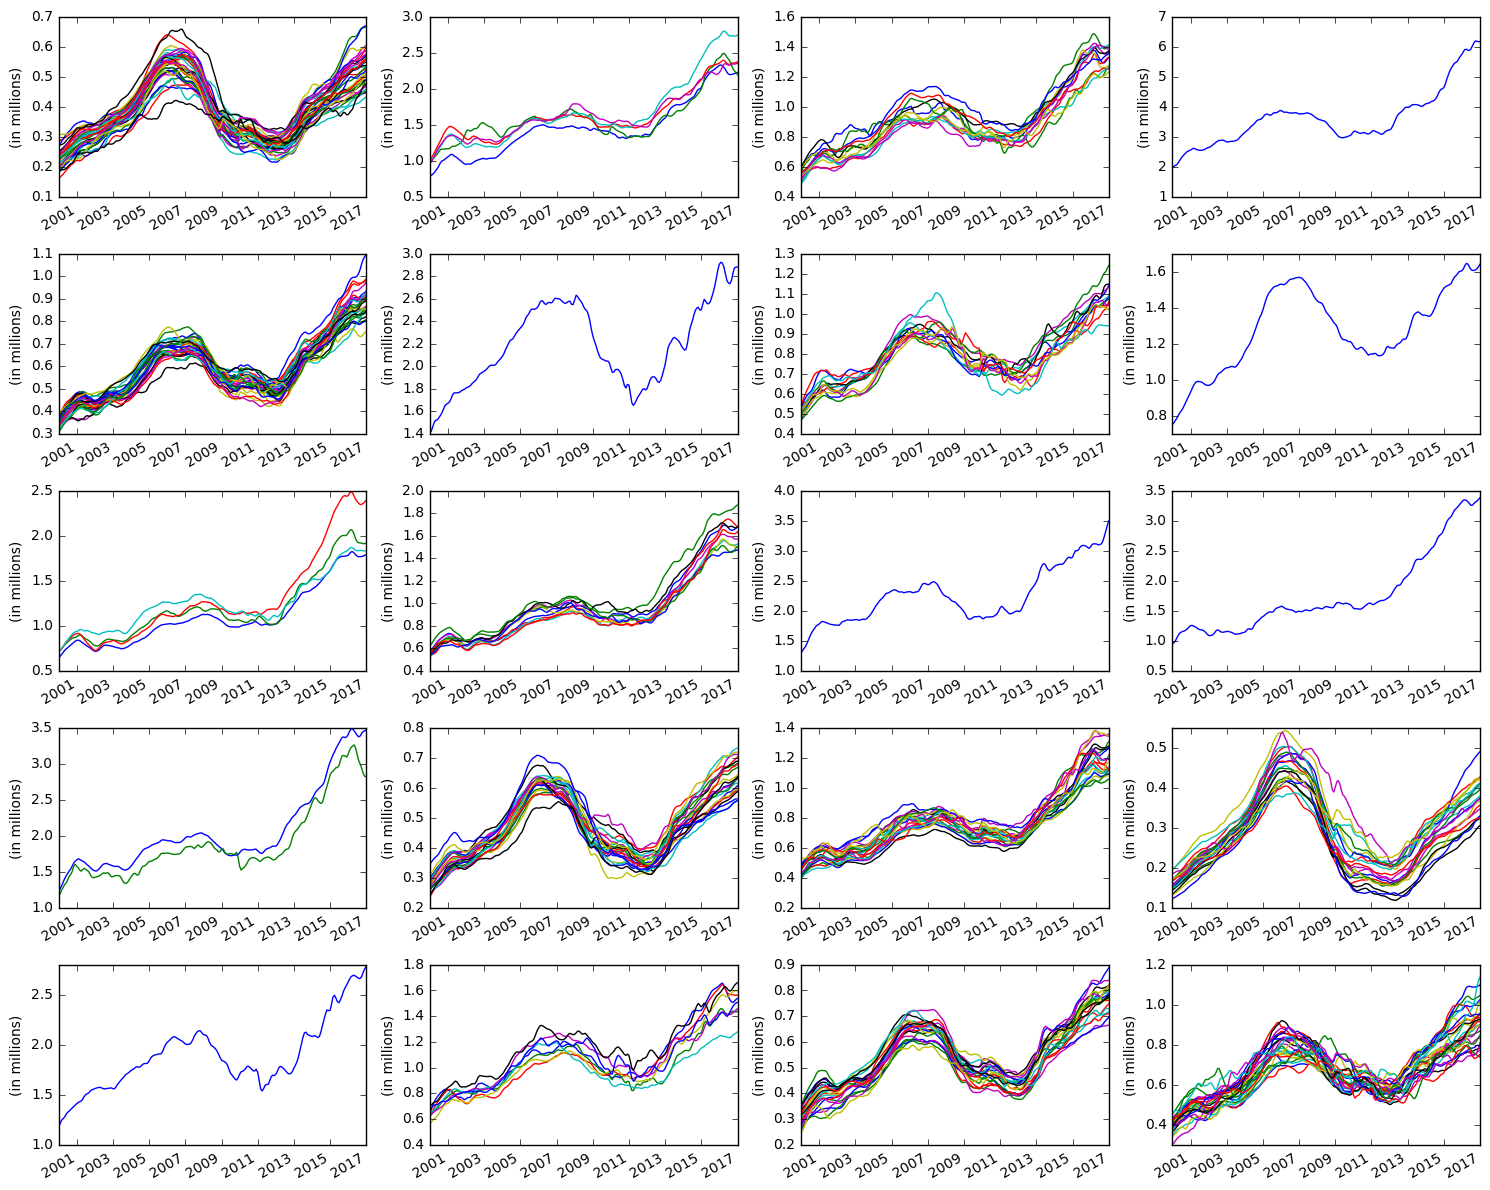

In [652]:
# Plot Zipcode clusters
plot_clusters(df_cluster,XT)


In [621]:
df1[['Zipcode','City','CountyName','Cluster']][df1.Cluster==11]
#df1.columns

,Zipcode,City,CountyName,Cluster
164,94301,Palo Alto,Santa Clara,11


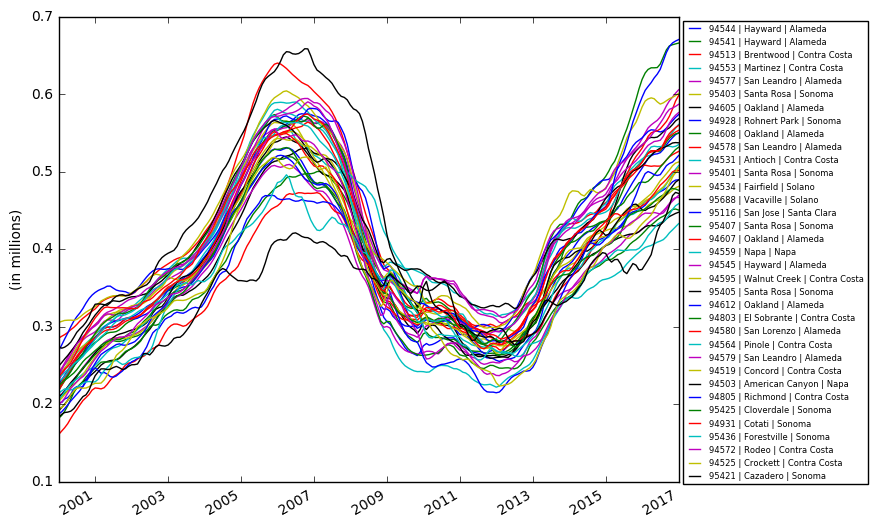

In [670]:
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(8, 6))

for zipcode,city,county in df[['Zipcode','City','CountyName']][df.Cluster==0].values:
            zc = int(zipcode)
            ts = pd.Series(XT[zc])/1000000
            ax.set_ylabel("(in millions)")
            plt.setp(ax.get_xticklabels(), rotation=30, horizontalalignment='right')
            
            ax.plot(ts,label=str(zipcode)+' | '+city+' | '+county)
            plt.legend(bbox_to_anchor=(1, 1), loc=2,prop={'size':6})